In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }</style>"))

In [2]:
from utilities import *
from models import *

In [3]:
from scipy import signal
import joblib

In [4]:
data = read_data('../Data/rssi5.csv')
test = read_data('../Data/testRssi.csv')
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')
test_pin = read_pin('../Data/testPin.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [5]:
def reg_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        data[s].fillna(ss, inplace=True)

In [6]:
train, validation = train_validation_split(data)
train.reset_index(drop=True, inplace=True)
validation.reset_index(drop=True, inplace=True)

In [7]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [8]:
train["X"] = train["location"].apply(lambda x: pin[x]["X"])
train["Y"] = train["location"].apply(lambda x: pin[x]["Y"])
train[scanners] = min_max_scaling(train[scanners])
reg_impute(train)
train

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
19292,2019-12-02 01:05:32.956,V1_32,0.192054,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.066667,...,0.077300,0.516762,0.344318,0.335946,0.060484,0.428165,0.374575,0.203435,29.68940,11.2860
36821,2019-12-02 01:05:32.976,V1_32,0.429648,0.231976,0.245399,0.455792,0.363201,0.175482,0.194454,0.505886,...,0.384965,0.082174,0.374116,0.300000,0.421047,0.260198,0.021254,0.437832,29.68940,11.2860
34168,2019-12-02 01:05:33.015,V1_32,0.396606,0.280835,0.252288,0.520171,0.379498,0.206379,0.212461,0.498110,...,0.324089,0.107965,0.430617,0.468271,0.419315,0.298553,0.036337,0.417820,29.68940,11.2860
8021,2019-12-02 01:05:33.034,V1_32,0.192054,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.150689,...,0.077300,0.516762,0.344318,0.350000,0.060484,0.428165,0.374575,0.203435,29.68940,11.2860
11129,2019-12-02 01:05:33.096,V1_32,0.240194,0.474703,0.314843,0.321935,0.364623,0.465082,0.408748,0.233101,...,0.121176,0.375901,0.476275,0.444946,0.149368,0.543603,0.533333,0.257875,29.68940,11.2860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,2019-12-12 01:47:54.481,V1_26,0.516667,0.349804,0.305150,0.218726,0.301720,0.496920,0.486371,0.150689,...,0.077300,0.516762,0.344318,0.335946,0.060484,0.428165,0.374575,0.203435,6.25565,12.1664
26566,2019-12-12 01:47:54.683,V1_26,0.411347,0.353837,0.305977,0.383333,0.433431,0.269984,0.265770,0.449929,...,0.306017,0.166058,0.491754,0.533585,0.365368,0.347862,0.083012,0.418071,6.25565,12.1664
36774,2019-12-12 01:47:54.736,V1_26,0.357608,0.207494,0.191345,0.467783,0.317063,0.141724,0.157242,0.497200,...,0.683333,0.049134,0.368984,0.401658,0.472761,0.249235,-0.011210,0.391315,6.25565,12.1664
17676,2019-12-12 01:47:54.772,V1_26,0.127113,0.299532,0.241733,0.177710,0.241734,0.445472,0.434598,0.106664,...,0.024200,0.553575,0.304568,0.266667,0.018062,0.409642,0.401008,0.159652,6.25565,12.1664


In [9]:
validation["X"] = validation["location"].apply(lambda x: pin[x]["X"])
validation["Y"] = validation["location"].apply(lambda x: pin[x]["Y"])
validation[scanners] = min_max_scaling(validation[scanners])
reg_impute(validation)

In [10]:
test["X"] = test["location"].apply(lambda x: test_pin[x]["X"])
test["Y"] = test["location"].apply(lambda x: test_pin[x]["Y"])
test[scanners] = min_max_scaling(test[scanners])
reg_impute(test)

In [11]:
def plot_rssi(data, loc, ble, lpass=False):
    l = data[data['location'] == loc]
    x = np.arange(l[ble].size)
    plt.scatter(x, l[ble], s=10)
    if lpass:
        smoothed = lfilter(l[ble])
        plt.plot(x, smoothed, c='r')

In [12]:
def lfilter(xn):
    if isinstance(xn, pd.Series):
        xn = xn.values
    b, a = signal.butter(5, 0.1)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])
    return z

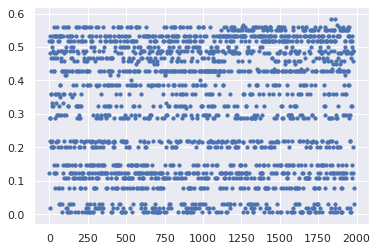

In [13]:
plot_rssi(train, 'V1_23', 'E6D9D20DD197')

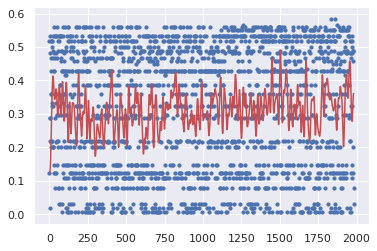

In [14]:
plot_rssi(train, 'V1_23', 'E6D9D20DD197', lpass=True)

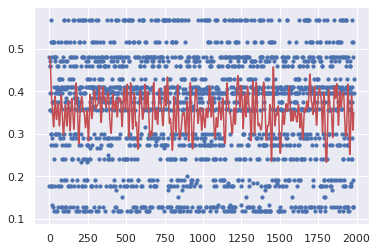

In [15]:
plot_rssi(train, 'V1_23', 'C400A2E19293', lpass=True)

In [16]:
def fn(sub_df):
    for s in scanners:
        sub_df[s] = lfilter(sub_df[s])
    return sub_df

lfiltered_train = train.groupby('location').apply(fn)

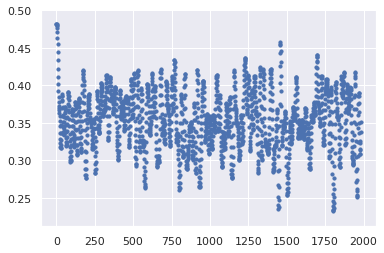

In [17]:
plot_rssi(lfiltered_train, 'V1_23', 'C400A2E19293')

In [18]:
lfiltered_validation = validation.groupby('location').apply(fn)
lfiltered_test = test.groupby('location').apply(fn)

In [19]:
X_train, y_train = lfiltered_train[scanners].values, lfiltered_train[["X", "Y"]].values
X_validation, y_validation = lfiltered_validation[scanners].values, lfiltered_validation[["X", "Y"]].values
X_test, y_test = lfiltered_test[scanners].values, lfiltered_test[["X", "Y"]].values

In [20]:
model = MLPRegressor(model_type='special')

In [21]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 39730 samples, validate on 9933 samples
Epoch 1/4000
39730/39730 [==============================] - 2s 57us/sample - loss: 105.6653 - mae: 7.7513 - mse: 105.5817 - val_loss: 33.8464 - val_mae: 4.5560 - val_mse: 33.7930
Epoch 2/4000
39730/39730 [==============================] - 1s 36us/sample - loss: 33.6463 - mae: 4.5465 - mse: 33.6024 - val_loss: 33.2476 - val_mae: 4.5189 - val_mse: 33.2065
Epoch 3/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 33.1126 - mae: 4.5145 - mse: 33.0713 - val_loss: 32.7675 - val_mae: 4.4936 - val_mse: 32.7256
Epoch 4/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 32.6348 - mae: 4.4837 - mse: 32.5922 - val_loss: 32.3377 - val_mae: 4.4563 - val_mse: 32.2941
Epoch 5/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 32.1926 - mae: 4.4516 - mse: 32.1477 - val_loss: 31.9379 - val_mae: 4.4208 - val_mse: 31.8917
Epoch 6/4000
39730/39730 [==============================] - 1s 2

Epoch 47/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 24.5045 - mae: 3.7632 - mse: 23.9942 - val_loss: 25.4219 - val_mae: 3.7946 - val_mse: 24.9055
Epoch 48/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 24.3722 - mae: 3.7482 - mse: 23.8498 - val_loss: 25.2538 - val_mae: 3.7795 - val_mse: 24.7250
Epoch 49/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 24.1993 - mae: 3.7313 - mse: 23.6640 - val_loss: 25.1542 - val_mae: 3.7626 - val_mse: 24.6126
Epoch 50/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 24.0712 - mae: 3.7167 - mse: 23.5227 - val_loss: 25.0387 - val_mae: 3.7662 - val_mse: 24.4836
Epoch 51/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 23.9116 - mae: 3.7019 - mse: 23.3496 - val_loss: 24.9477 - val_mae: 3.7371 - val_mse: 24.3784
Epoch 52/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 23.7607 - mae: 3.6830 - ms

39730/39730 [==============================] - 1s 29us/sample - loss: 18.8051 - mae: 3.1855 - mse: 17.8281 - val_loss: 19.9711 - val_mae: 3.2102 - val_mse: 18.9919
Epoch 94/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 18.7273 - mae: 3.1776 - mse: 17.7455 - val_loss: 19.9032 - val_mae: 3.2828 - val_mse: 18.9189
Epoch 95/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 18.6364 - mae: 3.1693 - mse: 17.6493 - val_loss: 19.8180 - val_mae: 3.2618 - val_mse: 18.8281
Epoch 96/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 18.5480 - mae: 3.1597 - mse: 17.5555 - val_loss: 19.4993 - val_mae: 3.2218 - val_mse: 18.5040
Epoch 97/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 18.4549 - mae: 3.1507 - mse: 17.4569 - val_loss: 19.5170 - val_mae: 3.2234 - val_mse: 18.5166
Epoch 98/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 18.3840 - mae: 3.1432 - mse: 17.3812 - v

Epoch 139/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 16.1238 - mae: 2.8947 - mse: 14.9711 - val_loss: 16.6421 - val_mae: 2.9314 - val_mse: 15.4886
Epoch 140/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 16.0801 - mae: 2.8907 - mse: 14.9257 - val_loss: 16.6967 - val_mae: 2.9205 - val_mse: 15.5423
Epoch 141/4000
39730/39730 [==============================] - 1s 37us/sample - loss: 16.0648 - mae: 2.8909 - mse: 14.9092 - val_loss: 16.5139 - val_mae: 2.9193 - val_mse: 15.3572
Epoch 142/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 16.0344 - mae: 2.8853 - mse: 14.8773 - val_loss: 16.5080 - val_mae: 2.9219 - val_mse: 15.3498
Epoch 143/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 15.9886 - mae: 2.8797 - mse: 14.8295 - val_loss: 16.4782 - val_mae: 2.9373 - val_mse: 15.3184
Epoch 144/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 15.9613 - mae: 2.879

Epoch 185/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 14.4881 - mae: 2.7223 - mse: 13.2630 - val_loss: 14.9330 - val_mae: 2.7451 - val_mse: 13.7075
Epoch 186/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 14.4674 - mae: 2.7215 - mse: 13.2411 - val_loss: 14.6331 - val_mae: 2.7315 - val_mse: 13.4065
Epoch 187/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 14.4115 - mae: 2.7151 - mse: 13.1845 - val_loss: 14.6254 - val_mae: 2.7414 - val_mse: 13.3986
Epoch 188/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 14.3706 - mae: 2.7126 - mse: 13.1431 - val_loss: 14.6130 - val_mae: 2.7358 - val_mse: 13.3857
Epoch 189/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 14.3569 - mae: 2.7133 - mse: 13.1293 - val_loss: 14.7876 - val_mae: 2.7238 - val_mse: 13.5593
Epoch 190/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 14.3154 - mae: 2.707

Epoch 231/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.3649 - mae: 2.6204 - mse: 12.1552 - val_loss: 13.8224 - val_mae: 2.6488 - val_mse: 12.6131
Epoch 232/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.3376 - mae: 2.6169 - mse: 12.1286 - val_loss: 14.8829 - val_mae: 2.7831 - val_mse: 13.6746
Epoch 233/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.3390 - mae: 2.6175 - mse: 12.1308 - val_loss: 14.1654 - val_mae: 2.6560 - val_mse: 12.9581
Epoch 234/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.3125 - mae: 2.6154 - mse: 12.1055 - val_loss: 13.7478 - val_mae: 2.6589 - val_mse: 12.5414
Epoch 235/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.2911 - mae: 2.6145 - mse: 12.0853 - val_loss: 14.0358 - val_mae: 2.6940 - val_mse: 12.8302
Epoch 236/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 13.2911 - mae: 2.613

Epoch 277/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 12.8364 - mae: 2.5628 - mse: 11.6565 - val_loss: 13.3612 - val_mae: 2.5897 - val_mse: 12.1815
Epoch 278/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.8285 - mae: 2.5634 - mse: 11.6486 - val_loss: 13.5919 - val_mae: 2.6179 - val_mse: 12.4124
Epoch 279/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 12.8250 - mae: 2.5609 - mse: 11.6458 - val_loss: 13.5461 - val_mae: 2.6243 - val_mse: 12.3673
Epoch 280/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 12.8221 - mae: 2.5612 - mse: 11.6437 - val_loss: 13.3528 - val_mae: 2.5878 - val_mse: 12.1743
Epoch 281/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 12.8047 - mae: 2.5598 - mse: 11.6258 - val_loss: 13.6648 - val_mae: 2.6437 - val_mse: 12.4862
Epoch 282/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.7988 - mae: 2.557

Epoch 323/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 12.4870 - mae: 2.5146 - mse: 11.3031 - val_loss: 13.2413 - val_mae: 2.5448 - val_mse: 12.0573
Epoch 324/4000
39730/39730 [==============================] - 1s 36us/sample - loss: 12.4685 - mae: 2.5120 - mse: 11.2844 - val_loss: 14.3427 - val_mae: 2.6445 - val_mse: 13.1587
Epoch 325/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 12.4810 - mae: 2.5142 - mse: 11.2966 - val_loss: 13.0750 - val_mae: 2.5558 - val_mse: 11.8906
Epoch 326/4000
39730/39730 [==============================] - 1s 35us/sample - loss: 12.4558 - mae: 2.5109 - mse: 11.2708 - val_loss: 13.0484 - val_mae: 2.5449 - val_mse: 11.8636
Epoch 327/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 12.4502 - mae: 2.5093 - mse: 11.2649 - val_loss: 14.5025 - val_mae: 2.7137 - val_mse: 13.3169
Epoch 328/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 12.4526 - mae: 2.511

Epoch 369/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.2132 - mae: 2.4767 - mse: 11.0143 - val_loss: 12.9638 - val_mae: 2.5457 - val_mse: 11.7648
Epoch 370/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.2011 - mae: 2.4764 - mse: 11.0017 - val_loss: 12.8427 - val_mae: 2.5137 - val_mse: 11.6432
Epoch 371/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.2184 - mae: 2.4767 - mse: 11.0188 - val_loss: 12.7700 - val_mae: 2.5221 - val_mse: 11.5702
Epoch 372/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.1990 - mae: 2.4752 - mse: 10.9990 - val_loss: 13.1588 - val_mae: 2.5754 - val_mse: 11.9584
Epoch 373/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.1983 - mae: 2.4752 - mse: 10.9978 - val_loss: 12.8503 - val_mae: 2.5070 - val_mse: 11.6491
Epoch 374/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 12.1854 - mae: 2.473

Epoch 415/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9880 - mae: 2.4453 - mse: 10.7720 - val_loss: 12.9007 - val_mae: 2.5344 - val_mse: 11.6846
Epoch 416/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9816 - mae: 2.4442 - mse: 10.7654 - val_loss: 12.6562 - val_mae: 2.4786 - val_mse: 11.4399
Epoch 417/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9766 - mae: 2.4442 - mse: 10.7601 - val_loss: 12.9876 - val_mae: 2.5277 - val_mse: 11.7710
Epoch 418/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9893 - mae: 2.4450 - mse: 10.7727 - val_loss: 12.6000 - val_mae: 2.4913 - val_mse: 11.3831
Epoch 419/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9695 - mae: 2.4428 - mse: 10.7524 - val_loss: 13.7982 - val_mae: 2.6370 - val_mse: 12.5810
Epoch 420/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.9783 - mae: 2.444

Epoch 461/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.8157 - mae: 2.4193 - mse: 10.5848 - val_loss: 12.4793 - val_mae: 2.4822 - val_mse: 11.2482
Epoch 462/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.8005 - mae: 2.4183 - mse: 10.5690 - val_loss: 12.4015 - val_mae: 2.4588 - val_mse: 11.1699
Epoch 463/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 11.8209 - mae: 2.4222 - mse: 10.5893 - val_loss: 12.4630 - val_mae: 2.4715 - val_mse: 11.2310
Epoch 464/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.8084 - mae: 2.4203 - mse: 10.5761 - val_loss: 12.5688 - val_mae: 2.4855 - val_mse: 11.3360
Epoch 465/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.7995 - mae: 2.4170 - mse: 10.5663 - val_loss: 14.2241 - val_mae: 2.6318 - val_mse: 12.9911
Epoch 466/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.7785 - mae: 2.414

Epoch 507/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.6427 - mae: 2.3973 - mse: 10.3997 - val_loss: 12.3587 - val_mae: 2.4387 - val_mse: 11.1158
Epoch 508/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.6497 - mae: 2.3986 - mse: 10.4067 - val_loss: 12.3385 - val_mae: 2.4511 - val_mse: 11.0950
Epoch 509/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.6445 - mae: 2.3957 - mse: 10.4010 - val_loss: 12.6870 - val_mae: 2.4681 - val_mse: 11.4434
Epoch 510/4000
39730/39730 [==============================] - 1s 35us/sample - loss: 11.6397 - mae: 2.3946 - mse: 10.3958 - val_loss: 12.2907 - val_mae: 2.4426 - val_mse: 11.0467
Epoch 511/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 11.6291 - mae: 2.3955 - mse: 10.3848 - val_loss: 12.4578 - val_mae: 2.4754 - val_mse: 11.2133
Epoch 512/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.6342 - mae: 2.394

Epoch 553/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.5060 - mae: 2.3759 - mse: 10.2523 - val_loss: 12.6989 - val_mae: 2.5034 - val_mse: 11.4450
Epoch 554/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.5018 - mae: 2.3772 - mse: 10.2479 - val_loss: 12.2157 - val_mae: 2.4416 - val_mse: 10.9614
Epoch 555/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 11.5033 - mae: 2.3778 - mse: 10.2489 - val_loss: 12.2022 - val_mae: 2.4422 - val_mse: 10.9476
Epoch 556/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.5074 - mae: 2.3771 - mse: 10.2523 - val_loss: 12.3786 - val_mae: 2.4592 - val_mse: 11.1236
Epoch 557/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 11.4999 - mae: 2.3751 - mse: 10.2451 - val_loss: 12.3254 - val_mae: 2.4377 - val_mse: 11.0703
Epoch 558/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.5027 - mae: 2.374

Epoch 599/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3823 - mae: 2.3568 - mse: 10.1193 - val_loss: 12.2921 - val_mae: 2.4312 - val_mse: 11.0293
Epoch 600/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3798 - mae: 2.3582 - mse: 10.1167 - val_loss: 12.3826 - val_mae: 2.4510 - val_mse: 11.1196
Epoch 601/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3687 - mae: 2.3551 - mse: 10.1055 - val_loss: 12.5101 - val_mae: 2.4473 - val_mse: 11.2467
Epoch 602/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3500 - mae: 2.3528 - mse: 10.0864 - val_loss: 12.4774 - val_mae: 2.4867 - val_mse: 11.2139
Epoch 603/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3474 - mae: 2.3536 - mse: 10.0838 - val_loss: 12.2644 - val_mae: 2.4238 - val_mse: 11.0007
Epoch 604/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.3672 - mae: 2.356

Epoch 645/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.2177 - mae: 2.3341 - mse: 9.9463 - val_loss: 12.0365 - val_mae: 2.4024 - val_mse: 10.7652
Epoch 646/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.2274 - mae: 2.3341 - mse: 9.9562 - val_loss: 12.1054 - val_mae: 2.3960 - val_mse: 10.8340
Epoch 647/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 11.2260 - mae: 2.3348 - mse: 9.9543 - val_loss: 11.9847 - val_mae: 2.3889 - val_mse: 10.7127
Epoch 648/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.2304 - mae: 2.3365 - mse: 9.9582 - val_loss: 12.3120 - val_mae: 2.4532 - val_mse: 11.0399
Epoch 649/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 11.2073 - mae: 2.3343 - mse: 9.9351 - val_loss: 12.4259 - val_mae: 2.4119 - val_mse: 11.1536
Epoch 650/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 11.2315 - mae: 2.3343 - m

39730/39730 [==============================] - 1s 31us/sample - loss: 11.0894 - mae: 2.3162 - mse: 9.8123 - val_loss: 11.8607 - val_mae: 2.3703 - val_mse: 10.5835
Epoch 692/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.1027 - mae: 2.3162 - mse: 9.8253 - val_loss: 12.5113 - val_mae: 2.4383 - val_mse: 11.2338
Epoch 693/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 11.0911 - mae: 2.3161 - mse: 9.8138 - val_loss: 11.9174 - val_mae: 2.3639 - val_mse: 10.6406
Epoch 694/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.0872 - mae: 2.3151 - mse: 9.8100 - val_loss: 11.8530 - val_mae: 2.3689 - val_mse: 10.5756
Epoch 695/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 11.0938 - mae: 2.3176 - mse: 9.8165 - val_loss: 11.8616 - val_mae: 2.3730 - val_mse: 10.5841
Epoch 696/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 11.0825 - mae: 2.3139 - mse: 9.8051 - va

39730/39730 [==============================] - 1s 29us/sample - loss: 10.9800 - mae: 2.2990 - mse: 9.6988 - val_loss: 12.1919 - val_mae: 2.3910 - val_mse: 10.9108
Epoch 738/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.9731 - mae: 2.2992 - mse: 9.6920 - val_loss: 11.9394 - val_mae: 2.3861 - val_mse: 10.6583
Epoch 739/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.9694 - mae: 2.2999 - mse: 9.6883 - val_loss: 12.6055 - val_mae: 2.4590 - val_mse: 11.3241
Epoch 740/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.9548 - mae: 2.2981 - mse: 9.6733 - val_loss: 11.7974 - val_mae: 2.3520 - val_mse: 10.5159
Epoch 741/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.9523 - mae: 2.2964 - mse: 9.6707 - val_loss: 12.0649 - val_mae: 2.4158 - val_mse: 10.7830
Epoch 742/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.9551 - mae: 2.2950 - mse: 9.6733 - va

39730/39730 [==============================] - 1s 35us/sample - loss: 10.8578 - mae: 2.2815 - mse: 9.5725 - val_loss: 12.6982 - val_mae: 2.4375 - val_mse: 11.4128
Epoch 784/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 10.8622 - mae: 2.2827 - mse: 9.5769 - val_loss: 11.8377 - val_mae: 2.3469 - val_mse: 10.5523
Epoch 785/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 10.8421 - mae: 2.2814 - mse: 9.5566 - val_loss: 12.1495 - val_mae: 2.4179 - val_mse: 10.8639
Epoch 786/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.8335 - mae: 2.2797 - mse: 9.5481 - val_loss: 12.0595 - val_mae: 2.4053 - val_mse: 10.7737
Epoch 787/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.8386 - mae: 2.2798 - mse: 9.5528 - val_loss: 12.2359 - val_mae: 2.3986 - val_mse: 10.9502
Epoch 788/4000
39730/39730 [==============================] - 1s 35us/sample - loss: 10.8388 - mae: 2.2798 - mse: 9.5533 - va

39730/39730 [==============================] - 1s 31us/sample - loss: 10.7357 - mae: 2.2658 - mse: 9.4475 - val_loss: 11.7258 - val_mae: 2.3238 - val_mse: 10.4378
Epoch 830/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.7245 - mae: 2.2646 - mse: 9.4364 - val_loss: 11.6630 - val_mae: 2.3555 - val_mse: 10.3749
Epoch 831/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.7351 - mae: 2.2655 - mse: 9.4467 - val_loss: 11.7195 - val_mae: 2.3515 - val_mse: 10.4314
Epoch 832/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.7141 - mae: 2.2640 - mse: 9.4261 - val_loss: 11.6283 - val_mae: 2.3528 - val_mse: 10.3402
Epoch 833/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.7151 - mae: 2.2644 - mse: 9.4269 - val_loss: 11.7238 - val_mae: 2.3343 - val_mse: 10.4357
Epoch 834/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.7256 - mae: 2.2654 - mse: 9.4376 - va

39730/39730 [==============================] - 1s 29us/sample - loss: 10.5987 - mae: 2.2495 - mse: 9.3088 - val_loss: 11.6301 - val_mae: 2.3087 - val_mse: 10.3402
Epoch 876/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.6077 - mae: 2.2495 - mse: 9.3174 - val_loss: 11.5748 - val_mae: 2.3363 - val_mse: 10.2847
Epoch 877/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.6165 - mae: 2.2499 - mse: 9.3262 - val_loss: 11.4747 - val_mae: 2.3038 - val_mse: 10.1847
Epoch 878/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.5912 - mae: 2.2481 - mse: 9.3009 - val_loss: 11.5413 - val_mae: 2.3225 - val_mse: 10.2510
Epoch 879/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.6030 - mae: 2.2497 - mse: 9.3125 - val_loss: 12.5415 - val_mae: 2.4018 - val_mse: 11.2512
Epoch 880/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.6079 - mae: 2.2500 - mse: 9.3175 - va

39730/39730 [==============================] - 1s 29us/sample - loss: 10.4819 - mae: 2.2361 - mse: 9.1911 - val_loss: 11.6516 - val_mae: 2.3452 - val_mse: 10.3608
Epoch 922/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.4756 - mae: 2.2334 - mse: 9.1847 - val_loss: 11.5137 - val_mae: 2.3224 - val_mse: 10.2229
Epoch 923/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.4937 - mae: 2.2348 - mse: 9.2030 - val_loss: 11.3853 - val_mae: 2.3139 - val_mse: 10.0946
Epoch 924/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.4760 - mae: 2.2360 - mse: 9.1848 - val_loss: 11.5742 - val_mae: 2.3179 - val_mse: 10.2832
Epoch 925/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.4786 - mae: 2.2347 - mse: 9.1875 - val_loss: 11.4168 - val_mae: 2.3022 - val_mse: 10.1258
Epoch 926/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.4846 - mae: 2.2346 - mse: 9.1938 - va

39730/39730 [==============================] - 1s 29us/sample - loss: 10.3791 - mae: 2.2202 - mse: 9.0870 - val_loss: 11.2739 - val_mae: 2.2703 - val_mse: 9.9820
Epoch 968/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.3831 - mae: 2.2209 - mse: 9.0910 - val_loss: 11.3240 - val_mae: 2.2836 - val_mse: 10.0321
Epoch 969/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.3780 - mae: 2.2191 - mse: 9.0862 - val_loss: 11.2446 - val_mae: 2.2776 - val_mse: 9.9528
Epoch 970/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.3811 - mae: 2.2214 - mse: 9.0890 - val_loss: 12.0797 - val_mae: 2.3602 - val_mse: 10.7878
Epoch 971/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.3711 - mae: 2.2211 - mse: 9.0792 - val_loss: 11.3467 - val_mae: 2.3098 - val_mse: 10.0549
Epoch 972/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.3734 - mae: 2.2177 - mse: 9.0817 - val_

39730/39730 [==============================] - 1s 29us/sample - loss: 10.2852 - mae: 2.2064 - mse: 8.9929 - val_loss: 11.3405 - val_mae: 2.2899 - val_mse: 10.0484
Epoch 1014/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.2715 - mae: 2.2071 - mse: 8.9796 - val_loss: 11.2182 - val_mae: 2.2803 - val_mse: 9.9263
Epoch 1015/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.2852 - mae: 2.2068 - mse: 8.9932 - val_loss: 11.2257 - val_mae: 2.2693 - val_mse: 9.9338
Epoch 1016/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 10.2882 - mae: 2.2071 - mse: 8.9962 - val_loss: 11.2615 - val_mae: 2.2655 - val_mse: 9.9697
Epoch 1017/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.2635 - mae: 2.2076 - mse: 8.9716 - val_loss: 11.1885 - val_mae: 2.2816 - val_mse: 9.8964
Epoch 1018/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.2784 - mae: 2.2049 - mse: 8.9862 - v

Epoch 1059/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.1877 - mae: 2.1954 - mse: 8.8951 - val_loss: 11.1448 - val_mae: 2.2766 - val_mse: 9.8521
Epoch 1060/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.1986 - mae: 2.1957 - mse: 8.9058 - val_loss: 11.1165 - val_mae: 2.2636 - val_mse: 9.8239
Epoch 1061/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.1840 - mae: 2.1942 - mse: 8.8910 - val_loss: 11.1487 - val_mae: 2.2703 - val_mse: 9.8556
Epoch 1062/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.1932 - mae: 2.1952 - mse: 8.9000 - val_loss: 11.4259 - val_mae: 2.3077 - val_mse: 10.1325
Epoch 1063/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.1851 - mae: 2.1944 - mse: 8.8919 - val_loss: 11.3324 - val_mae: 2.2947 - val_mse: 10.0388
Epoch 1064/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.1756 - mae: 2.1918 

Epoch 1105/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.1178 - mae: 2.1847 - mse: 8.8237 - val_loss: 11.3983 - val_mae: 2.3204 - val_mse: 10.1043
Epoch 1106/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.1044 - mae: 2.1834 - mse: 8.8106 - val_loss: 11.9067 - val_mae: 2.3206 - val_mse: 10.6128
Epoch 1107/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.1070 - mae: 2.1811 - mse: 8.8130 - val_loss: 11.0721 - val_mae: 2.2481 - val_mse: 9.7781
Epoch 1108/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 10.0962 - mae: 2.1821 - mse: 8.8019 - val_loss: 11.1371 - val_mae: 2.2558 - val_mse: 9.8433
Epoch 1109/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.1057 - mae: 2.1829 - mse: 8.8118 - val_loss: 11.1278 - val_mae: 2.2571 - val_mse: 9.8336
Epoch 1110/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 10.1049 - mae: 2.1813 

Epoch 1151/4000
39730/39730 [==============================] - 1s 31us/sample - loss: 10.0122 - mae: 2.1710 - mse: 8.7160 - val_loss: 11.1773 - val_mae: 2.2567 - val_mse: 9.8809
Epoch 1152/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.0251 - mae: 2.1701 - mse: 8.7286 - val_loss: 11.1386 - val_mae: 2.2495 - val_mse: 9.8421
Epoch 1153/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.0253 - mae: 2.1715 - mse: 8.7289 - val_loss: 11.0652 - val_mae: 2.2503 - val_mse: 9.7688
Epoch 1154/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.0113 - mae: 2.1694 - mse: 8.7151 - val_loss: 11.4323 - val_mae: 2.2992 - val_mse: 10.1359
Epoch 1155/4000
39730/39730 [==============================] - 1s 32us/sample - loss: 10.0041 - mae: 2.1674 - mse: 8.7078 - val_loss: 11.4399 - val_mae: 2.2671 - val_mse: 10.1439
Epoch 1156/4000
39730/39730 [==============================] - 1s 34us/sample - loss: 10.0029 - mae: 2.1676 

39730/39730 [==============================] - 1s 30us/sample - loss: 9.9385 - mae: 2.1593 - mse: 8.6429 - val_loss: 11.1024 - val_mae: 2.2453 - val_mse: 9.8068
Epoch 1198/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 9.9408 - mae: 2.1613 - mse: 8.6451 - val_loss: 11.1405 - val_mae: 2.2688 - val_mse: 9.8451
Epoch 1199/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 9.9373 - mae: 2.1602 - mse: 8.6418 - val_loss: 11.1476 - val_mae: 2.2585 - val_mse: 9.8523
Epoch 1200/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 9.9341 - mae: 2.1587 - mse: 8.6389 - val_loss: 12.0556 - val_mae: 2.3397 - val_mse: 10.7602
Epoch 1201/4000
39730/39730 [==============================] - 1s 29us/sample - loss: 9.9295 - mae: 2.1592 - mse: 8.6342 - val_loss: 11.1429 - val_mae: 2.2671 - val_mse: 9.8477
Epoch 1202/4000
39730/39730 [==============================] - 1s 30us/sample - loss: 9.9362 - mae: 2.1606 - mse: 8.6411 - val_los

39730/39730 [==============================] - 1s 31us/sample - loss: 9.8824 - mae: 2.1517 - mse: 8.5874 - val_loss: 11.2619 - val_mae: 2.2751 - val_mse: 9.9669
Epoch 1244/4000
39730/39730 [==============================] - 1s 33us/sample - loss: 9.8910 - mae: 2.1528 - mse: 8.5961 - val_loss: 11.0834 - val_mae: 2.2431 - val_mse: 9.7882


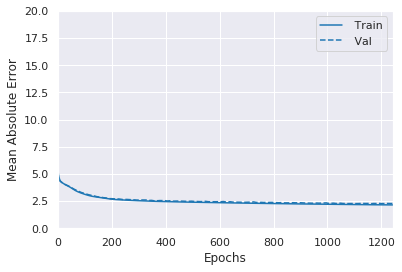

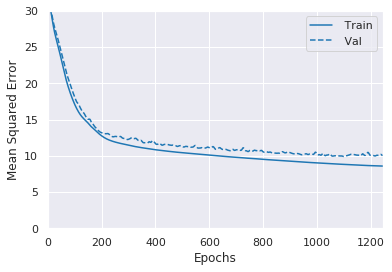

In [22]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 12.0929 - mae: 2.2431 - mse: 9.7882
Validation loss: 11.083359975631438
Mean absolute error: 2.2431033
Mean squared error: 9.788224
Average distance error: 3.586096498414984


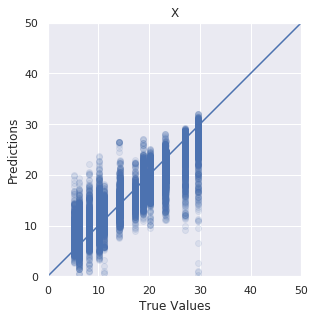

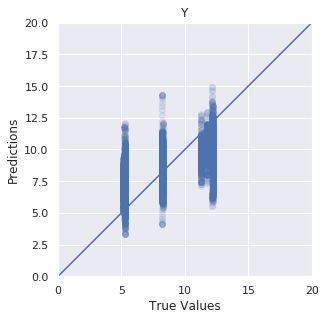

In [23]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 11.6046 - mae: 1.6302 - mse: 5.5024
Test loss: 6.797581746860666
Mean absolute error: 1.6301645
Mean squared error: 5.5024486
Average distance error: 2.7561390383348643


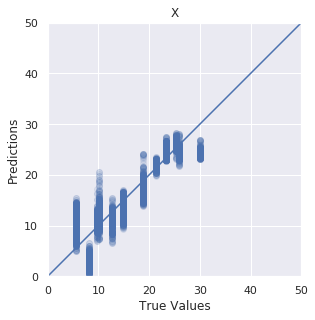

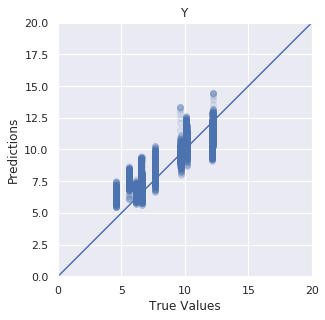

In [24]:
model.model_testing(X_test, y_test)

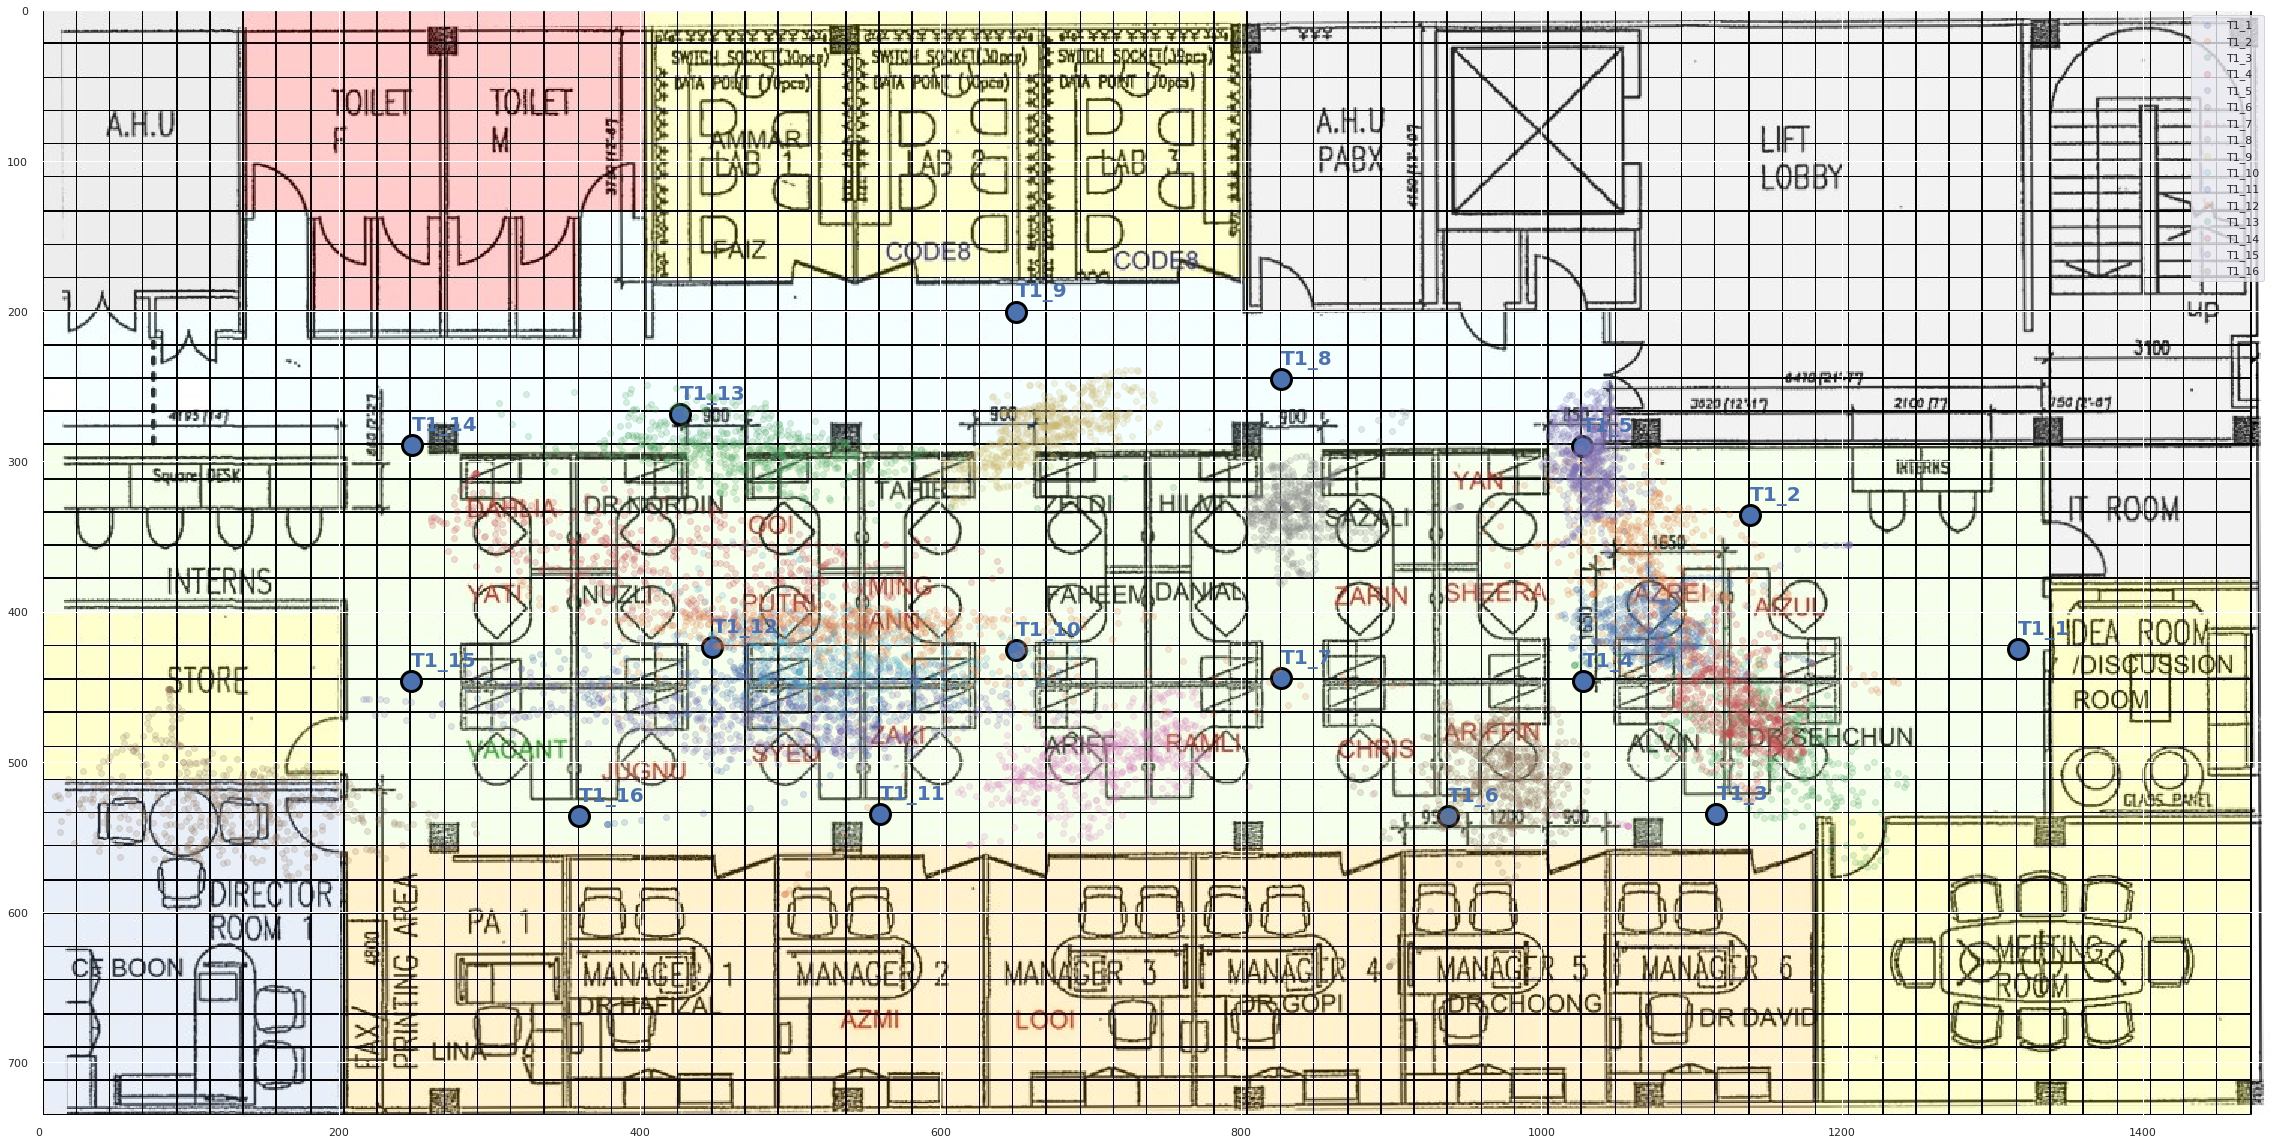

In [25]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = lfiltered_test[lfiltered_test['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()

In [26]:
model.model.save_weights('../Models/MLP_Regression_Rolling_FFill_MinMax_ExtraTest_LinearDistanceModel_FourierTransform.h5')